In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,r2_score,precision_score,recall_score,f1_score,auc

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df = df.drop("deck",axis=1)

In [7]:
df["age"] = df["age"].fillna(df["age"].mean())

In [8]:
df = df.dropna()

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<Axes: xlabel='sex', ylabel='survived'>

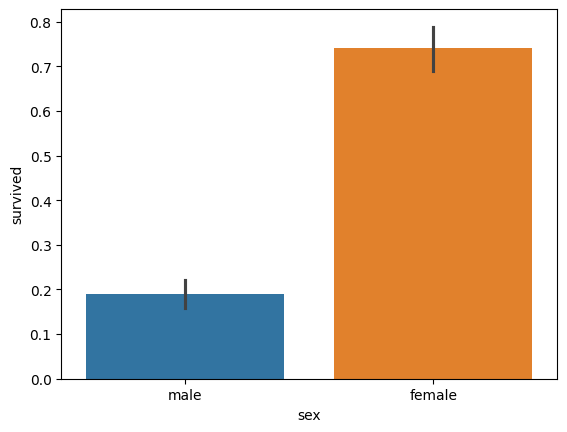

In [10]:
sns.barplot(x="sex",y="survived",data=df,hue="sex")

<Axes: xlabel='survived,sex'>

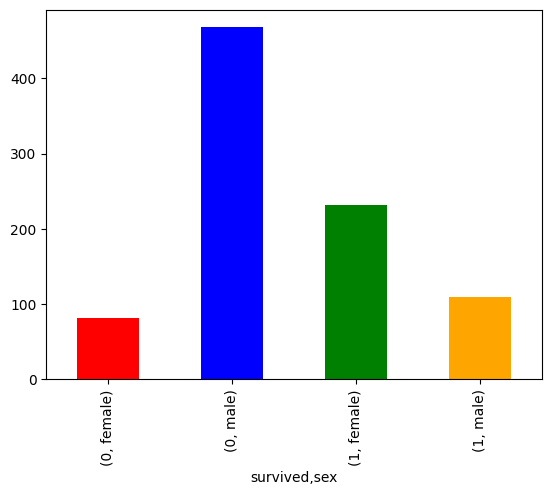

In [11]:
df.groupby(["survived","sex"])["survived"].count().plot(kind="bar",color=["red", "blue", "green", "orange"])

In [12]:
x = df.drop("survived",axis=1)
y = df["survived"]

In [13]:
mms = MinMaxScaler()
lb_e = LabelEncoder()

In [14]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        x[col] = mms.fit_transform(x[[col]])
    else:
        x[col] = lb_e.fit_transform(x[col])

In [15]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1.0,1,0.271174,0.125,0.0,0.014151,2,2,1,1.0,2,0,0.0
1,0.0,0,0.472229,0.125,0.0,0.139136,0,0,2,0.0,0,1,0.0
2,1.0,0,0.321438,0.000,0.0,0.015469,2,2,2,0.0,2,1,1.0
3,0.0,0,0.434531,0.125,0.0,0.103644,2,0,2,0.0,2,1,0.0
4,1.0,1,0.434531,0.000,0.0,0.015713,2,2,1,1.0,2,0,1.0


In [16]:
dt = DecisionTreeClassifier()

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42)

In [18]:
model = dt.fit(xtrain,ytrain)

In [19]:
print(f'train score is: {model.score(xtrain,ytrain)}')

train score is: 1.0


In [20]:
print(f'test score is: {model.score(xtest,ytest)}')

test score is: 1.0


In [21]:
pred_y  = model.predict(xtest)

In [22]:
print(f'classification reports is: {classification_report(ytest,pred_y)}')

classification reports is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [23]:
cm = confusion_matrix(ytest,pred_y)
print(cm)

[[109   0]
 [  0  69]]


<Axes: >

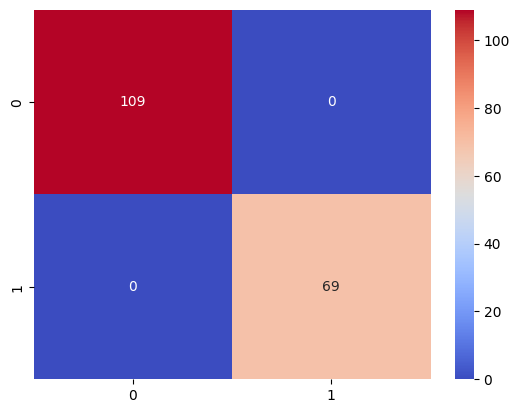

In [27]:
sns.heatmap(cm, cmap="coolwarm",fmt='d',annot=True)

In [30]:
precision_score(ytest,pred_y)

1.0

In [31]:
recall_score(ytest,pred_y)

1.0

In [33]:
f1_score(ytest,pred_y)

1.0

In [34]:
accuracy_score(ytest,pred_y)

1.0

In [35]:
r2_score(ytest,pred_y)

1.0

In [37]:
rc_score = roc_auc_score(ytest,pred_y)
rc_score

1.0

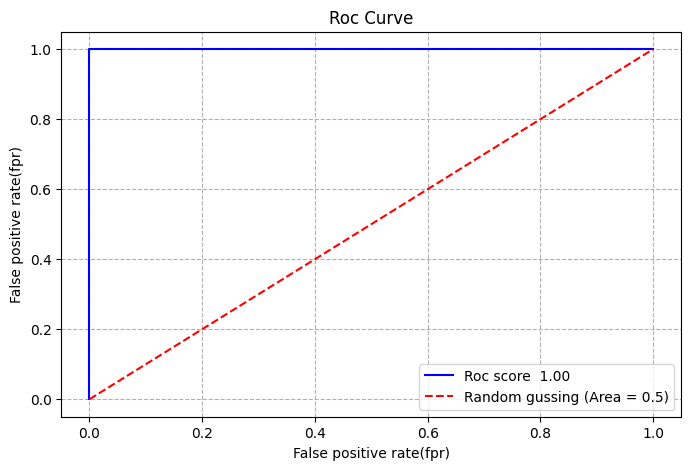

In [41]:
fpr,tpr, _ = roc_curve(ytest,pred_y)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr,tpr,color= "blue", label = f"Roc score {roc_auc: .2f}")
plt.plot([0,1],[0,1],color = "red",linestyle = '--',label = f'Random gussing (Area = 0.5)')
plt.title("Roc Curve")
plt.xlabel('False positive rate(fpr)')
plt.ylabel('False positive rate(fpr)')
plt.legend(loc= 'lower right')
plt.grid(True,linestyle = '--')
plt.show()